Epoch 1/100
 - 2s - loss: 0.0102
Epoch 2/100
 - 0s - loss: 0.0080
Epoch 3/100
 - 0s - loss: 0.0073
Epoch 4/100
 - 0s - loss: 0.0064
Epoch 5/100
 - 0s - loss: 0.0056
Epoch 6/100
 - 0s - loss: 0.0049
Epoch 7/100
 - 0s - loss: 0.0042
Epoch 8/100
 - 0s - loss: 0.0033
Epoch 9/100
 - 0s - loss: 0.0025
Epoch 10/100
 - 0s - loss: 0.0018
Epoch 11/100
 - 0s - loss: 0.0012
Epoch 12/100
 - 0s - loss: 6.8214e-04
Epoch 13/100
 - 0s - loss: 3.4008e-04
Epoch 14/100
 - 0s - loss: 1.5679e-04
Epoch 15/100
 - 0s - loss: 6.3167e-05
Epoch 16/100
 - 0s - loss: 2.8709e-05
Epoch 17/100
 - 0s - loss: 1.4431e-05
Epoch 18/100
 - 0s - loss: 1.1608e-05
Epoch 19/100
 - 0s - loss: 1.0041e-05
Epoch 20/100
 - 0s - loss: 9.9085e-06
Epoch 21/100
 - 0s - loss: 1.0481e-05
Epoch 22/100
 - 0s - loss: 1.0246e-05
Epoch 23/100
 - 0s - loss: 9.4777e-06
Epoch 24/100
 - 0s - loss: 1.1199e-05
Epoch 25/100
 - 0s - loss: 9.5778e-06
Epoch 26/100
 - 0s - loss: 9.9405e-06
Epoch 27/100
 - 0s - loss: 9.8523e-06
Epoch 28/100
 - 0s - loss: 

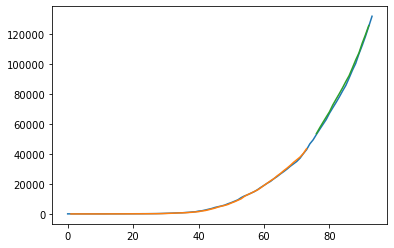

In [2]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf


# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('Confirmed.csv', index_col='Date', engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)



# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = trainX.reshape((trainX.shape[0], 1, trainX.shape[1]))
testX = testX.reshape((testX.shape[0], 1, testX.shape[1]))

# create and fit the RNN network
model = Sequential()
model.add(LSTM(18, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
model.reset_states()
trainPredict = model.predict(trainX)
model.reset_states()
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [8]:
df = pd.read_csv('Confirmed.csv',index_col='Date')
df

,Confirmed
Date,
21-02-2020,1
22-02-2020,1
23-02-2020,2
24-02-2020,3
25-02-2020,3
...,...
20-05-2020,106750
21-05-2020,112359
22-05-2020,118447


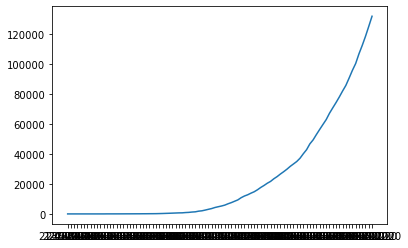

In [9]:
plt.plot(df.Confirmed)
plt.show()

In [ ]:
test_data_size = 19

train = df[:-test_data_size]
test = df[-test_data_size:]


In [ ]:
scaler = MinMaxScaler()

scaler.fit(train)


In [6]:
scaled_train = scaler.transform(train)#and divide every point by max value
scaled_test = scaler.transform(test)
print(scaled_train[-5:])

[[0.75229804]
 [0.81237093]
 [0.86728083]
 [0.945738  ]
 [1.        ]]


In [7]:
scaled_train.shape

(76, 1)

In [8]:
## feed in batches [t1,t2,t3] --> t4
from keras.preprocessing.sequence import TimeseriesGenerator

In [9]:
## how to decide num of inputs , 
n_input = 5  ## number of steps
n_features = 1 ## number of features you want to predict (for univariate time series n_features=1)
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size=1)

In [10]:
len(scaled_train)

76

In [11]:
len(generator)

71

In [12]:
x,y = generator[50]

In [13]:
(x.shape,y.shape)

((1, 5, 1), (1, 1))

In [14]:

(x,y)


(array([[[0.15241952],
         [0.17100628],
         [0.18932982],
         [0.2189512 ],
         [0.24158737]]]), array([[0.2583114]]))

In [15]:
y

array([[0.2583114]])

In [16]:

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

In [17]:
model = Sequential()
model.add(LSTM(150,input_shape=(n_input,n_features)))
#model.add(Dropout(0.2))
model.add(Dense(75))
model.add(Dense(units=1))
#model.add(Activation('softmax'))
#model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 76        
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [19]:
validation_set = np.append(scaled_train[50],scaled_test)
validation_set= validation_set.reshape(20,1)
validation_set

array([[0.15241952],
       [1.07209962],
       [1.14073699],
       [1.20795708],
       [1.27430654],
       [1.35960721],
       [1.43257744],
       [1.50394817],
       [1.57930755],
       [1.65962745],
       [1.73535129],
       [1.83510832],
       [1.93881353],
       [2.03126139],
       [2.16134845],
       [2.27491395],
       [2.39817777],
       [2.5329014 ],
       [2.66991294],
       [2.81117635]])

In [20]:
## how to decide num of inputs , 
n_input = 5
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length=5,batch_size=1)

In [21]:
validation_gen[0][0].shape,validation_gen[0][1].shape

((1, 5, 1), (1, 1))

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

In [23]:
model.fit_generator(generator,validation_data=validation_gen,epochs=100,callbacks=[early_stop],steps_per_epoch=10)


Epoch 1/100
10/10 [==============================] - 3s 300ms/step - loss: 0.0785 - val_loss: 0.2809
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 0.0176 - val_loss: 0.1205
Epoch 3/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0067 - val_loss: 0.0589
Epoch 4/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0013 - val_loss: 0.4131
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 7.0780e-04 - val_loss: 1.1679
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0014 - val_loss: 0.6140
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 8/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0011 - val_loss: 0.0110
Epoch 9/100
10/10 [==============================] - 0s 20ms/step - loss: 3.0100e-04 - val_loss: 0.0255
Epoch 10/100
10/10 [==============================] - 0s 17ms/step - loss: 2.8371e-04 - val

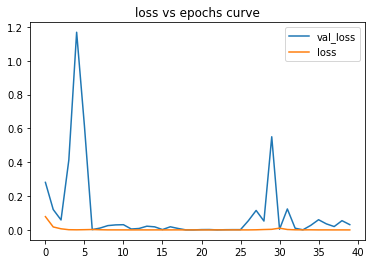

In [24]:
pd.DataFrame(model.history.history).plot(title="loss vs epochs curve")

In [25]:

model.history.history.keys()


dict_keys(['val_loss', 'loss'])

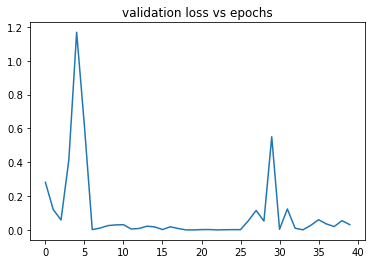

In [26]:
myloss = model.history.history["val_loss"]
plt.title("validation loss vs epochs")
plt.plot(range(len(myloss)),myloss)


Forecast

In [47]:
## holding predictions
test_prediction = []

##last n points from training set
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape(1,n_input,n_features)

In [48]:

current_batch.shape

(1, 5, 1)

In [49]:
## how far in future we can predict
for i in range(len(test)+13):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [50]:
test_prediction

[array([1.0404037], dtype=float32),
 array([1.1086786], dtype=float32),
 array([1.1782296], dtype=float32),
 array([1.2509367], dtype=float32),
 array([1.3240343], dtype=float32),
 array([1.4019597], dtype=float32),
 array([1.4873918], dtype=float32),
 array([1.5767322], dtype=float32),
 array([1.6705941], dtype=float32),
 array([1.769218], dtype=float32),
 array([1.8732193], dtype=float32),
 array([1.9824888], dtype=float32),
 array([2.096484], dtype=float32),
 array([2.2151482], dtype=float32),
 array([2.338228], dtype=float32),
 array([2.465325], dtype=float32),
 array([2.59583], dtype=float32),
 array([2.7290218], dtype=float32),
 array([2.86412], dtype=float32),
 array([3.000209], dtype=float32),
 array([3.1362784], dtype=float32),
 array([3.2712555], dtype=float32),
 array([3.404054], dtype=float32),
 array([3.533612], dtype=float32),
 array([3.6589243], dtype=float32),
 array([3.7790847], dtype=float32),
 array([3.8933194], dtype=float32),
 array([4.001011], dtype=float32),
 arr

In [67]:

### inverse scaled data
true_prediction = scaler.inverse_transform(test_prediction)
true_prediction[:,0]


array([ 51386.53991437,  54758.63503313,  58193.7584815 ,  61784.76591444,
        65395.05571818,  69243.78749228,  73463.28245854,  77875.80131626,
        82511.64241052,  87382.67543888,  92519.29883814,  97916.11943221,
       103546.34208536, 109407.17011786, 115486.08029222, 121763.40753412,
       128209.04190636, 134787.38609171, 141459.88712406, 148181.32710791,
       154901.78972578, 161568.30880737, 168127.22342825, 174526.09731531,
       180715.27321196, 186649.99246693, 192292.04360342, 197610.92809296,
       202584.49623203, 207199.02957058, 211448.85232067, 215335.80145931])

In [66]:
from pandas.tseries.offsets import DateOffset
from datetime import datetime
time_series_array = test.index

    
for k in range(0,13):
    time_series_array = test.index
    nextd=pd.date_range('26-05-2020',periods=13)
    nextd=nextd.strftime('%d-%m-%Y')
    time_series_array = time_series_array.append(nextd)


In [77]:
df_forecast = pd.DataFrame(index=time_series_array)
df_forecast.loc[:,"confirmed"] = test
df_forecast["confirmed_predicted"] = true_prediction[:,0]
df_forecast

,confirmed,confirmed_predicted
07-05-2020,52952.0,51386.539914
08-05-2020,56342.0,54758.635033
09-05-2020,59662.0,58193.758482
10-05-2020,62939.0,61784.765914
11-05-2020,67152.0,65395.055718
12-05-2020,70756.0,69243.787492
13-05-2020,74281.0,73463.282459
14-05-2020,78003.0,77875.801316
15-05-2020,81970.0,82511.642411
16-05-2020,85710.0,87382.675439


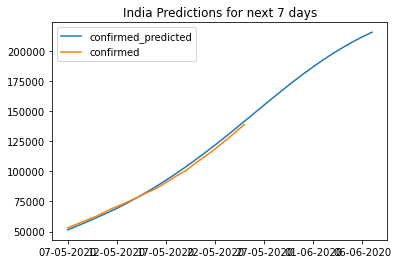

In [72]:
df_forecast.plot(title="India Predictions for next 7 days")